In [1]:
from collections import OrderedDict
import os

import pandas as pd
import numpy as np
import xarray as xr


basedir = '/g/data3/hh5/tmp/cosima/'
exptdict = OrderedDict([
    ('1deg',   {'model':'access-om2', 'expt':'1deg_jra55v13_iaf_spinup1_B1',  #'1deg_jra55v13_iaf_spinup1_B1', #'1deg_jra55v13_iaf_spinup1_A',
                'desc': 'ACCESS-OM2','n_files':-12,
                'time_units':'days since 1718-01-01','offset':-87658}),
    ('025deg', {'model':'access-om2-025', 'expt':'025deg_jra55v13_iaf_gmredi6', #'025deg_jra55v13_iaf_gmredi',
                    'desc': 'ACCESS-OM2-025','n_files':-30,
                    'time_units':'days since 1718-01-01','offset':-87658}),
    ('01deg',  {'model':'access-om2-01',  'expt':'01deg_jra55v13_iaf',
                'desc': 'ACCESS-OM2-01','n_files':None,
                    'time_units':'days since 0001-01-01','offset':None})
])
for k in exptdict.keys():
    if not('exptdir' in exptdict[k]):
        exptdict[k]['exptdir'] = os.path.join(os.path.join(
            basedir, 
            exptdict[k]['model']),
            exptdict[k]['expt' ])


# Lists of models, experiments dirs and descriptors in consistent order

models    = [exptdict[k]['model']   for k in exptdict.keys()]

expts     = [exptdict[k]['expt']    for k in exptdict.keys()]

exptdirs  = [exptdict[k]['exptdir'] for k in exptdict.keys()]

descs     = [exptdict[k]['desc']    for k in exptdict.keys()]

def model_expt_exptdir_desc(keyname):
    """
    Return (model, expt, exptdir, desc) strings for keyname in exptdict.keys()
    
    Examples:
    
    (model, expt, exptdir, desc) = model_expt_exptdir_desc('1deg')
    
    for k in exptdict.keys():
        (model, expt, exptdir, desc) = model_expt_exptdir_desc(k)
    
    """
    return (exptdict[keyname]['model'],
            exptdict[keyname]['expt'],
            exptdict[keyname]['exptdir'],
            exptdict[keyname]['desc'])


# define common start and end dates for climatologies
clim_tstart = pd.to_datetime('1993', format='%Y')
clim_tend = clim_tstart + pd.DateOffset(years=25)

In [2]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import IPython.display
import cmocean as cm
import gsw

from dask.distributed import Client

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
print('Available exptdata keys: ', [k for k in exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [3]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [4]:
%%time
ekey='01deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
mld_01deg = cc.get_nc_variable(expt,'ocean_month.nc','mld',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').compute()
pv_01deg = cc.get_nc_variable(expt,'ocean.nc','vert_pv',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
pot_rho_0_01deg = cc.get_nc_variable(expt,'ocean.nc','pot_rho_0',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(clim_tstart,clim_tend)).sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 48min 19s, sys: 6min 59s, total: 55min 19s
Wall time: 1h 9min 40s


In [5]:
#pot_rho_0_01deg=pot_tho_0_01deg
f = gsw.f(pot_rho_0_01deg.yt_ocean)
pv_01deg_norelvort = (pot_rho_0_01deg.diff(dim='st_ocean') / pot_rho_0_01deg.st_ocean.diff(dim='st_ocean')) / 1035. * f * 9.81

In [6]:
%%time
ekey='025deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
mld_025deg = cc.get_nc_variable(expt,'ocean_month.nc','mld',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(xt_ocean=-120.,method='nearest').compute()
pot_rho_0_025deg = cc.get_nc_variable(expt,'ocean.nc','pot_rho_0',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
f = gsw.f(pot_rho_0_025deg.yt_ocean)
pv_025deg = (pot_rho_0_025deg.diff(dim='st_ocean') / pot_rho_0_025deg.st_ocean.diff(dim='st_ocean')) / 1035. * f * 9.81

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 1min 42s, sys: 37.7 s, total: 2min 20s
Wall time: 3min


In [7]:
%%time
ekey='1deg'
expt = exptdict[ekey]['expt']
n_files = exptdict[ekey]['n_files']
time_units = exptdict[ekey]['time_units']
offset = exptdict[ekey]['offset']
mld_1deg = cc.get_nc_variable(expt,'ocean_month.nc','mld',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(xt_ocean=-120.,method='nearest').compute()
pot_rho_0_1deg = cc.get_nc_variable(expt,'ocean.nc','pot_rho_0',
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(xt_ocean=-120.,method='nearest').sel(st_ocean=slice(0,1500)).mean('time').compute()
f = gsw.f(pot_rho_0_1deg.yt_ocean)
pv_1deg = (pot_rho_0_1deg.diff(dim='st_ocean') / pot_rho_0_1deg.st_ocean.diff(dim='st_ocean')) / 1035 * f * 9.81

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() 

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() 

CPU times: user 48.1 s, sys: 30.9 s, total: 1min 19s
Wall time: 2min 1s


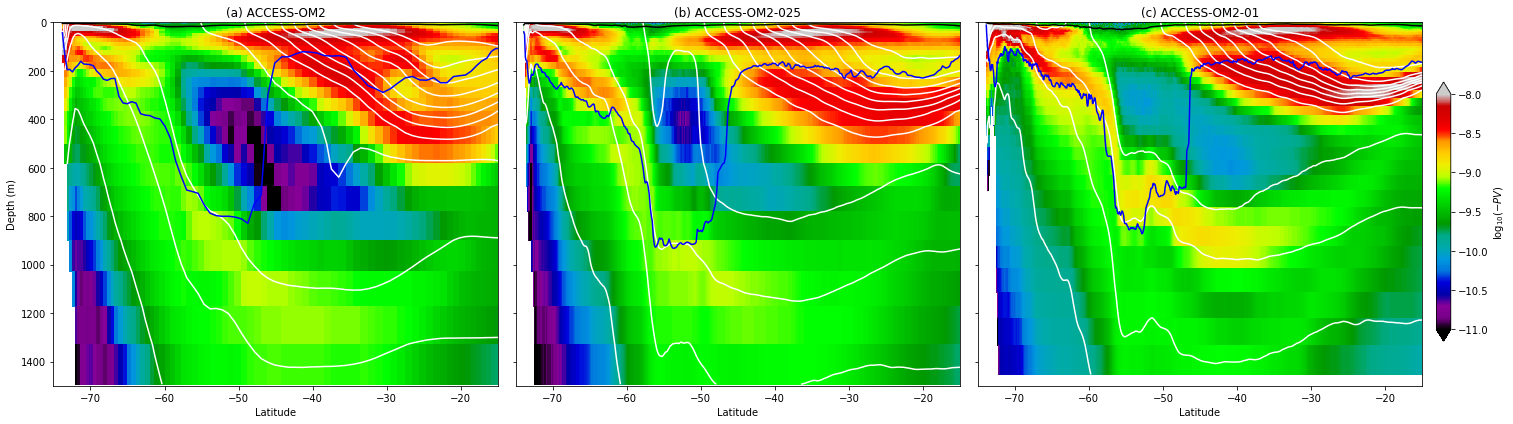

In [22]:
clev=np.arange(1025,1028.5,0.25)
cmp = plt.get_cmap('nipy_spectral')  # was jet

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
p1 = plt.pcolormesh(pv_1deg.yt_ocean,pv_1deg.st_ocean,np.log10(-pv_1deg),cmap=cmp)#,extend='both')
plt.plot(mld_1deg.yt_ocean,mld_1deg.max(axis=0),color='b')
plt.plot(mld_1deg.yt_ocean,mld_1deg.min(axis=0),color='k')
plt.clim(-11,-8.0)
# plt.colorbar()
CS = plt.contour(pot_rho_0_1deg.yt_ocean,pot_rho_0_1deg.st_ocean,pot_rho_0_1deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.title('(a) ACCESS-OM2')

plt.subplot(1,3,2)
plt.pcolormesh(pv_025deg.yt_ocean,pv_025deg.st_ocean,np.log10(-pv_025deg),cmap=cmp)#,extend='both')
plt.clim(-11,-8.0)
# plt.colorbar()
plt.plot(mld_025deg.yt_ocean,mld_025deg.max(axis=0),color='b')
plt.plot(mld_025deg.yt_ocean,mld_025deg.min(axis=0),color='k')
CS = plt.contour(pot_rho_0_025deg.yt_ocean,pot_rho_0_025deg.st_ocean,pot_rho_0_025deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
# plt.ylabel('Depth (m)')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().invert_yaxis()
plt.title('(b) ACCESS-OM2-025')

plt.subplot(1,3,3)
plt.pcolormesh(pv_01deg.yt_ocean,pv_01deg.st_ocean,np.log10(-pv_01deg_norelvort),cmap=cmp)#,extend='both')
plt.plot(mld_01deg.yt_ocean,mld_01deg.max(axis=0),color='b')
plt.plot(mld_01deg.yt_ocean,mld_01deg.min(axis=0),color='k')
plt.clim(-11,-8.0)
# plt.colorbar()
CS=plt.contour(pot_rho_0_01deg.yt_ocean,pot_rho_0_01deg.st_ocean,pot_rho_0_01deg,levels=clev,colors='w')
# plt.clabel(CS)
plt.xlim([-75,-15])
plt.ylim([0,1500])
plt.xlabel('Latitude')
# plt.ylabel('Depth (m)')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().invert_yaxis()
plt.title('(c) ACCESS-OM2-01')

#plt.subplot(1,3,3)
#plt.pcolormesh(pv_01deg.yt_ocean,pv_01deg.st_ocean,np.log10(-pv_01deg),cmap=cmp)
#plt.plot(mld_01deg.yt_ocean,mld_01deg.max(axis=0))
#plt.plot(mld_01deg.yt_ocean,mld_01deg.min(axis=0))
#plt.clim(-11,-8.5)
#plt.colorbar()
#CS=plt.contour(pot_rho_0_01deg.yt_ocean,pot_rho_0_01deg.st_ocean,pot_rho_0_01deg,levels=clev,colors='k')
#plt.clabel(CS)
#plt.xlim([-75,-15])
#plt.ylim([0,1500])
#plt.xlabel('Latitude')
#plt.ylabel('Depth [m]')
#plt.gca().invert_yaxis()
#plt.title('(c) ACCESS-OM2-01')

ax3 = plt.axes([1.0,0.2,0.01,0.6])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',extend='both')
cb.ax.set_ylabel('$\log_{10}(-PV)$')

plt.tight_layout()

savefigure('PV_slice_comparison')